# Libraries

In [4]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

### * In this section, we are calling MXnet libraries

In [5]:

from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from mxnet.gluon.data.vision import datasets, transforms
from IPython import display
import matplotlib.pyplot as plt
import time
import mxnet as mx

In [6]:
role = get_execution_role()
bucket='david-sara-jeff'
data_key = 'train.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

pd.read_csv(data_location)

ValueError: Must setup local AWS configuration with a region supported by SageMaker.

In [11]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot as plt
import matplotlib 
%matplotlib inline

In [12]:
#StatsModel
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [13]:
#NLP
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from sklearn.preprocessing import Normalizer
from pickle import load

from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.base import BaseEstimator,TransformerMixin

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eirajizad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/eirajizad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/eirajizad/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eirajizad/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from time import time
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from sklearn.preprocessing import Normalizer
from pickle import load

from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.base import BaseEstimator,TransformerMixin

In [15]:
df = pd.read_csv(data_location)

NameError: name 'data_location' is not defined

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
# check the structure

print("number of rows: {0}".format(df.shape[0]))
print("number of columns: {0}".format(df.shape[1]))

number of rows: 159571
number of columns: 8


In [10]:
# Check the structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
# check the structure
df.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [12]:
# add temp field for aggregation of toxic flags
df['temp1'] = df['toxic'] + df['severe_toxic'] + df['obscene'] + df['threat'] + df ['insult'] + df['identity_hate']

# add isToxic feature
df['istoxic'] = np.where(df['temp1'] ==0,0,1)

#drop unneccessary columns

df = df.drop(columns=['toxic','severe_toxic','obscene','threat','insult','identity_hate', 'temp1'], axis=1)

In [13]:
df.head()

,id,comment_text,istoxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
istoxic,159571.0,0.101679,0.302226,0.0,0.0,0.0,0.0,1.0


In [15]:
# Check valid unique values per column
df.groupby('istoxic')['istoxic'].count().sort_values(ascending=False)

istoxic
0    143346
1     16225
Name: istoxic, dtype: int64

In [16]:
class NLTKPreprocesor(BaseEstimator,TransformerMixin):
    # here, we are defining the initial condition of the calss
    def __init__(self,stopwords = None,punct = None,lower = True,strip=True):
        self.lower = lower
        self.strip = strip
        self.stopwords = stopwords or set(sw.words('english'))
        self.punct = punct or set(string.punctuation)
        self.lemmatizer = WordNetLemmatizer()
#        self.contractions = load(open('contractions.pickle','rb'))

    def fit(self,X,y=None):
        return self

    def inverse_transform(self,X):
        pass

    def transform(self,X):
        return [list(self.tokenize(doc)) for doc in X]
    
    # This is the funciton that break (text) into individual linguistic units.
    def tokenize(self,sDocument):
        document=sDocument
#        doc.strip(" ")
        for sent in sent_tokenize(document):
            for token,tag in pos_tag(wordpunct_tokenize(sent)):
                token = token.lower() if self.lower else token
                token = token.strip() if self.strip else token
                token = token.strip('_') if self.strip else token
                token = token.strip('*') if self.strip else token
                token = token.strip('#') if self.strip else token

                if token in self.stopwords:
                    continue

                if all(char in self.punct for char in token):
                    continue

                if len(token) <= 0:
                    continue

                lemma = self.lemmatize(token,tag)
                yield lemma

    def lemmatize(self,token,tag):
        tag ={
            'N' : wn.NOUN,
            'V' : wn.VERB,
            'R' : wn.ADV,
            'J' : wn.ADJ
        }.get(tag[0],wn.NOUN)
        return self.lemmatizer.lemmatize(token,tag)


def prepare_data(X,X_t):
    preProcess = Pipeline([
        ('NLTKpreprocess', NLTKPreprocesor()),
        ('vectorizer', TfidfVectorizer(
            max_df=0.90,
            max_features=5000,
            encoding='latin1',
            tokenizer=lambda x: x,
            preprocessor=None, lowercase=False))
    ])
    x_train = np.asanyarray(preProcess.fit_transform(X.values).todense())
#    x_valid = np.asanyarray(preProcess.fit_transform(X_v.values).todense())    
    x_test = np.asanyarray(preProcess.transform(X_t.values).todense())

    return x_train,x_test,preProcess


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [17]:
if __name__ == '__main__':
    data = pd.read_csv(data_location, dtype=str) ## reading the data from csv file ## 
    clf = NLTKPreprocesor()
    procData = clf.transform(data.loc[:, 'comment_text']) ## preprocessing the comments ##

In [18]:
pData=np.asarray(procData)
print(pData.shape[:])
print(data.loc[:,'toxic'].shape[:])

(159571,)
(159571,)


In [19]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
X_train, X_test, y_train, y_test=train_test_split(pData, data.loc[:,'toxic'], shuffle=False, test_size=0.1)
#trainData=data.loc[:int(Length*0.8),'comment_text'] ## Training Data
#validData=data.loc[int(Length*0.8):int(Length*0.9),'comment_text'] ## Validation data 
#tvData=data.loc[:int(Length*0.9),'comment_text'] ## Validation data 
#testData=data.loc[int(Length*0.9):,'comment_text'] ## testing data

In [20]:
toxicX_train=[]
NonToxic_train=[]
for i,comment in enumerate(X_train):
    if int(y_train[i])==1:
        toxicX_train.append(comment)
    else:
        NonToxic_train.append(comment)

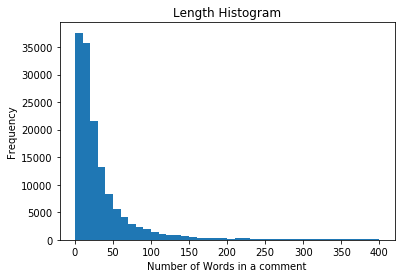

In [21]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.title("Length Histogram")
plt.xlabel("Number of Words in a comment")
plt.ylabel("Frequency")
plt.show()

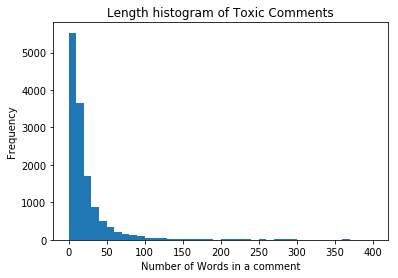

In [22]:
plt.clf()
ToxicNumWords = [len(one_comment) for one_comment in toxicX_train]
plt.hist(ToxicNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.title("Length histogram of Toxic Comments")
plt.xlabel("Number of Words in a comment")
plt.ylabel("Frequency")
plt.show()

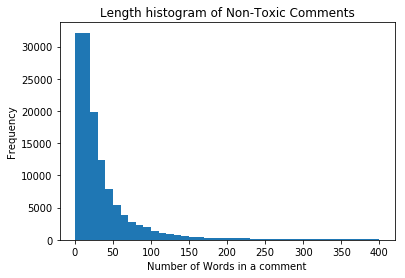

In [23]:
plt.clf()
NonToxicNumWords = [len(one_comment) for one_comment in NonToxic_train]
plt.hist(NonToxicNumWords,bins = np.arange(0,410,10))#[0,50,100,150,200,250,300,350,400])#,450,500,550,600,650,700,750,800,850,900])
plt.xlabel("Number of Words in a comment")
plt.title("Length histogram of Non-Toxic Comments")
plt.ylabel("Frequency")
plt.show()

In [24]:
print (np.asarray(NonToxicNumWords).sum())
ntoxic_text_train=[]
for x in NonToxic_train:
    x=' '.join(x)
    ntoxic_text_train.append(x.encode('utf-8'))

ntoxic_text_train=np.asarray(ntoxic_text_train)

4775000


In [25]:
print(np.asarray(ToxicNumWords).sum())
toxic_text_train=[]
for x in toxicX_train:
    x=' '.join(x)
    toxic_text_train.append(x.encode('utf-8'))

toxic_text_train=np.asarray(toxic_text_train)


397084


In [26]:
print(np.asarray(totalNumWords).sum())
text_train=[]
for x in X_train:
    x=' '.join(x)
    text_train.append(x.encode('utf-8'))

text_test=[]
for x in X_test:
    x=' '.join(x)
    text_test.append(x.encode('utf-8'))
text_train=np.asarray(text_train)
text_test=np.asarray(text_test)

5172084


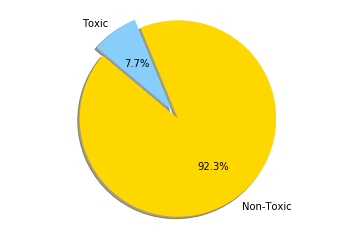

In [27]:
import matplotlib.pyplot as plt
 
# Data to plot
labels ='Non-Toxic', 'Toxic'
#title="Imbalanced classes"
sizes = [4774994, 397084]
colors = ['gold', 'lightskyblue']#, 'lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [28]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 22.9MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [29]:
!pip install keras

     |████████████████████████████████| 378kB 35.5MB/s eta 0:00:01


In [30]:
from keras.preprocessing.text import Tokenizer
# Any results you write 

from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import LSTM
from keras.layers import GlobalMaxPool1D
from keras.layers import Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint

max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
list_text_train=[]
L=np.asarray(text_train).tolist()
for i in range(len(L)):
    list_text_train.append(str(L[i]))
    
tokenizer.fit_on_texts(list_text_train)

Using TensorFlow backend.


In [31]:
import keras
keras.__version__

'2.3.1'

In [32]:
import operator
z=tokenizer.word_counts
sorted_tokens = sorted(z.items(), key=operator.itemgetter(1))
L=len(sorted_tokens)
print("Popular words in non-labeled Comments")
print(L)
for i in range(L-1,L-20,-1):
    print(sorted_tokens[i])

Popular words in non-labeled Comments
192921
('article', 64071)
('page', 49322)
('wikipedia', 41866)
('use', 29122)
('talk', 28721)
('xe2', 27586)
('one', 26770)
('make', 26756)
('would', 25639)
('like', 25188)
('edit', 24562)
('x80', 23781)
('please', 23433)
('see', 21872)
('say', 21817)
('think', 20376)
('know', 20330)
('source', 20132)
('get', 19050)


In [33]:
ToxicTokenizer = Tokenizer(num_words=max_features)
list_toxic_text_train=[]
L=np.asarray(toxic_text_train).tolist()
for i in range(len(L)):
    list_toxic_text_train.append(str(L[i]))

ToxicTokenizer.fit_on_texts(list(np.asarray(list_toxic_text_train)))


In [34]:
tz=ToxicTokenizer.word_counts
toxic_sorted_tokens = sorted(tz.items(), key=operator.itemgetter(1))

In [35]:
tL=len(toxic_sorted_tokens)
#print L
print("Popular words in Toxic Comments")
for i in range(tL-1,tL-20,-1):
    print(toxic_sorted_tokens[i])

Popular words in Toxic Comments
('fuck', 9279)
('suck', 4234)
('like', 3230)
('wikipedia', 3200)
('shit', 3192)
('go', 3170)
('u', 3064)
('nigger', 2984)
('get', 2623)
('page', 2197)
('know', 2118)
('hate', 2047)
('die', 2039)
('gay', 2024)
('bitch', 1908)
('faggot', 1854)
('moron', 1807)
('make', 1767)
('fucking', 1686)


In [36]:
NonToxicTokenizer = Tokenizer(num_words=max_features)
list_ntoxic_text_train=[]
L=np.asarray(ntoxic_text_train).tolist()
for i in range(len(L)):
    list_ntoxic_text_train.append(str(L[i]))

NonToxicTokenizer.fit_on_texts(list_ntoxic_text_train)

In [37]:
ntz=NonToxicTokenizer.word_counts
ntoxic_sorted_tokens = sorted(ntz.items(), key=operator.itemgetter(1))

In [38]:
nL = len(ntoxic_sorted_tokens)
print( "Popular words in Non-Toxic Comments")
print (L)
for i in range(nL-1,nL-20,-1):
    print (ntoxic_sorted_tokens[i])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [39]:
list_text_train=[]
L=np.asarray(text_train).tolist()
for i in range(len(L)):
    list_text_train.append(str(L[i]))
    
list_text_test=[]
L=np.asarray(text_test).tolist()
for i in range(len(L)):
    list_text_test.append(str(L[i]))    

list_tokenized_train = tokenizer.texts_to_sequences(list_text_train) 
list_tokenized_test = tokenizer.texts_to_sequences(list_text_test)

In [40]:
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(
            max_df=0.90,
            max_features=20000,
            encoding='latin1',
            preprocessor=None, lowercase=False)
tfidf.fit(list(np.asarray(text_train)))
tfidf_text_train =tfidf.transform(list(np.asarray(text_train)))
tfidf_text_test =tfidf.transform(list(np.asarray(text_test)))
print(tfidf_text_train.shape[:])
print(tfidf_text_test.shape[:])
#print ZZ[1,1]

(143613, 20000)
(15958, 20000)


In [41]:
from sklearn.naive_bayes import MultinomialNB
nbClf=MultinomialNB()
nbClf.fit(tfidf_text_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
tfidfPredicted=nbClf.predict(tfidf_text_test) ## Predicting the labels of test comments ##

In [43]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

tfIDF=[]
for i in range(len(tfidfPredicted)):
    tfIDF.append(int(tfidfPredicted[i]))

Y_test=y_test.tolist()
Y=[]
#print()
for i in range(len(y_test)):
#    print(i)#y_test[i])
    Y.append(int(Y_test[i]))
    
    
#fIDF)
records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    for j in range(len(list_classes)):
#        print(j)
#        print(metric(y_test,tfidfPredicted))
        print(tfidfPredicted)
        
#        print(y_test)
        records[metric_name][list_classes[j]]=metric(Y,tfIDF) ## Measuring the metrics ##

['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


In [44]:
# Pretty printing of the metrics #
from pprint import pprint
pprint(dict(records))

{'accuracy': {'toxic': 0.9467351798470987},
 'confusion_matrix': {'toxic': array([[14366,    49],
       [  801,   742]])},
 'f1': {'toxic': 0.6358183376178235},
 'f2': {'toxic': 0.532816314806836},
 'hamming_loss': {'toxic': 0.05326482015290136},
 'precision': {'toxic': 0.9380530973451328},
 'recall': {'toxic': 0.48088139987038236}}


In [45]:
## Use sklearn notes: link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
## Confusion matrix plotter ## 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14366    49]
 [  801   742]]


<Figure size 432x288 with 0 Axes>

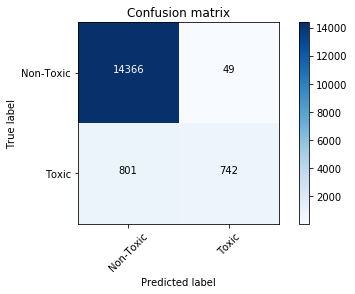

In [46]:
#print records["confusion_matrix"]["toxic"]
#import plot_confusion_matrix
plt.clf()
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"])

Normalized confusion matrix
[[0.99660076 0.00339924]
 [0.5191186  0.4808814 ]]


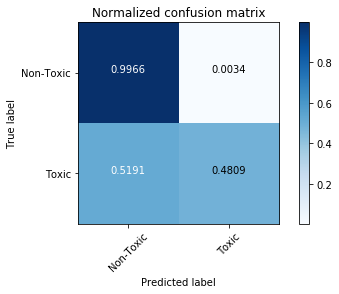

In [47]:
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=True,title='Normalized confusion matrix')
plt.show()

In [48]:
naivePred=np.zeros(tfidfPredicted.shape[:])
tfidfPredicted.shape[:]
naiveRecords = defaultdict(dict)

tfIDF=[]
for i in range(len(tfidfPredicted)):
    tfIDF.append(int(tfidfPredicted[i]))

Y_test=y_test.tolist()
Y=[]
#print()
for i in range(len(y_test)):
#    print(i)#y_test[i])
    Y.append(int(Y_test[i]))
    



for metric_name,metric in METRICS.items():
    for j in range(len(list_classes)):
        naiveRecords[metric_name][list_classes[j]]=metric(Y,naivePred)

/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [49]:
from pprint import pprint
pprint(dict(naiveRecords))


{'accuracy': {'toxic': 0.9033086852989096},
 'confusion_matrix': {'toxic': array([[14415,     0],
       [ 1543,     0]])},
 'f1': {'toxic': 0.0},
 'f2': {'toxic': 0.0},
 'hamming_loss': {'toxic': 0.09669131470109037},
 'precision': {'toxic': 0.0},
 'recall': {'toxic': 0.0}}


Confusion matrix, without normalization
[[14415     0]
 [ 1543     0]]


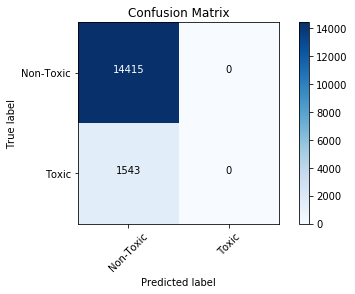

In [50]:
# plt.clf()
plt.figure()
plot_confusion_matrix(naiveRecords["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=False,title='Confusion Matrix')
plt.show()

In [51]:
maxlength=100
paddedTrain=pad_sequences(list_tokenized_train,maxlen=maxlength) # Padding the traning section
paddedTest=pad_sequences(list_tokenized_test,maxlen=maxlength) # Padding the testing section

## LSTM using keras 

In [53]:
# Importing LSTM Classifier,
#I have written a function for making the architecture using the given inputs for LSTM classifier #
checkCLF=LSTM_Classifier(embDim=128, lstmDim=60, hidDim=50, outDim=1, maxlen=100)
checkCLF.summary()
Path='weights.best.RNN.' # I saved the trained weights for extended use and transfer learning # 
checkpoint=ModelCheckpoint(filepath=Path,
                           verbose=1, save_best_only=True)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 100, 60)           45360     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 60)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
________________________________________________

In [54]:
epochs=15
history=checkCLF.fit(paddedTrain, y_train, validation_split=0.1,
                epochs=epochs,
                batch_size=256,
                callbacks=[checkpoint], verbose=1,
                )

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 129251 samples, validate on 14362 samples
Epoch 1/15
129251/129251 [==============================] - 66s 513us/step - loss: 0.1922 - accuracy: 0.9363 - val_loss: 0.1183 - val_accuracy: 0.9589

Epoch 00001: val_loss improved from inf to 0.11830, saving model to weights.best.RNN.
Epoch 2/15
129251/129251 [==============================] - 64s 497us/step - loss: 0.0996 - accuracy: 0.9634 - val_loss: 0.1148 - val_accuracy: 0.9600

Epoch 00002: val_loss improved from 0.11830 to 0.11480, saving model to weights.best.RNN.
Epoch 3/15
129251/129251 [==============================] - 64s 498us/step - loss: 0.0792 - accuracy: 0.9706 - val_loss: 0.1277 - val_accuracy: 0.9572

Epoch 00003: val_loss did not improve from 0.11480
Epoch 4/15
129251/129251 [==============================] - 64s 496us/step - loss: 0.0610 - accuracy: 0.9777 - val_loss: 0.1503 - val_accura

In [55]:
BestTrainPred=checkCLF.predict(paddedTrain) ## Predicting the results for test and training section using trained LSTM Classifier ##
BestTestPred=checkCLF.predict(paddedTest)

In [56]:
## binary formatting the probability predictions ## 
# Setting the threshhold 0.5 #
BinaryTrainPred=np.zeros(BestTrainPred.shape[:])
BinaryTestPred=np.zeros(BestTestPred.shape[:])

for i in range(len(BestTrainPred)):
    for j in range(1):
        if BestTrainPred[i,j] >= 0.5:
            BinaryTrainPred[i,j]=1
        else:
            BinaryTrainPred[i,j]=0
            
for i in range(len(BestTestPred)):
    for j in range(1):
        if BestTestPred[i,j] >= 0.5:
            BinaryTestPred[i,j]=1
        else:
            BinaryTestPred[i,j]=0

In [57]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import jaccard_similarity_score
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

ytest=y_test.tolist()
Y=[]
for i in range(len(ytest)):
    Y.append(int(ytest[i]))

records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    records[metric_name][list_classes[0]]=metric(Y,BinaryTestPred[:,0])

In [58]:
from pprint import pprint
pprint(dict(records))

{'accuracy': {'toxic': 0.9439152776037097},
 'confusion_matrix': {'toxic': array([[14003,   412],
       [  483,  1060]])},
 'f1': {'toxic': 0.703150912106136},
 'f2': {'toxic': 0.6933542647828362},
 'hamming_loss': {'toxic': 0.05608472239629026},
 'precision': {'toxic': 0.720108695652174},
 'recall': {'toxic': 0.6869734283862605}}


In [59]:
## Use sklearn notes: link: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
## Confusion matrix plotter ## 
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.4f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14003   412]
 [  483  1060]]


<Figure size 432x288 with 0 Axes>

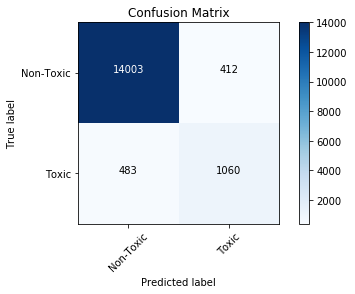

In [60]:
plt.clf()
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=False,title='Confusion Matrix')
plt.show()

Normalized confusion matrix
[[0.97141866 0.02858134]
 [0.31302657 0.68697343]]


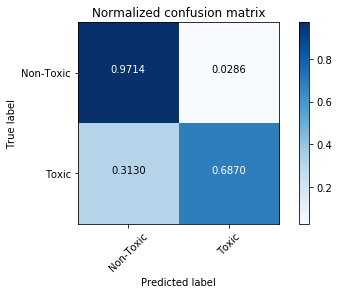

In [61]:
# I have used a code suggested in sklearn for plotting confusion matrix, check the  plot_confusion_matrix.py in this folder
# The link is documented inside its file 
plt.figure()
plot_confusion_matrix(records["confusion_matrix"]["toxic"],["Non-Toxic","Toxic"],normalize=True,title='Normalized confusion matrix')
plt.show()

# * LSTM using MXNet

In [3]:
layer = mx.gluon.rnn.LSTM(100, 3)
layer.initialize()
input = paddedTrain
# by default zeros are used as begin state
output = layer(input)
# manually specify begin state.
h0 = mx.nd.random.uniform(shape=(3, 3, 100))
c0 = mx.nd.random.uniform(shape=(3, 3, 100))
output, hn = layer(input, [h0, c0])

NameError: name 'paddedTrain' is not defined

In [ ]:
epochs=15
history=layer.fit(paddedTrain, y_train, validation_split=0.1,
                epochs=epochs,
                batch_size=256,
                callbacks=[checkpoint], verbose=1,
                )

In [ ]:
BestTrainPred=checkCLF.predict(paddedTrain) ## Predicting the results for test and training section using trained LSTM Classifier ##
BestTestPred=checkCLF.predict(paddedTest)

In [ ]:
## binary formatting the probability predictions ## 
# Setting the threshhold 0.5 #
BinaryTrainPred=np.zeros(BestTrainPred.shape[:])
BinaryTestPred=np.zeros(BestTestPred.shape[:])

for i in range(len(BestTrainPred)):
    for j in range(1):
        if BestTrainPred[i,j] >= 0.5:
            BinaryTrainPred[i,j]=1
        else:
            BinaryTrainPred[i,j]=0
            
for i in range(len(BestTestPred)):
    for j in range(1):
        if BestTestPred[i,j] >= 0.5:
            BinaryTestPred[i,j]=1
        else:
            BinaryTestPred[i,j]=0

In [ ]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, fbeta_score  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import jaccard_similarity_score
from functools import partial
from collections import defaultdict 

METRICS = {
    "confusion_matrix":confusion_matrix,
    "hamming_loss": hamming_loss,
    "accuracy": accuracy_score,
    "precision": precision_score,     
    "recall": recall_score, 
    "f1": f1_score,
    "f2": partial(fbeta_score, beta=2),
}

ytest=y_test.tolist()
Y=[]
for i in range(len(ytest)):
    Y.append(int(ytest[i]))

records = defaultdict(dict)
list_classes=[]
list_classes.append("toxic")
for metric_name,metric in METRICS.items():
    records[metric_name][list_classes[0]]=metric(Y,BinaryTestPred[:,0])

In [ ]:
from pprint import pprint
pprint(dict(records))